In [1]:
import numpy as np
import os
from manim import *
from manim import config
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

Manim Community v0.17.3

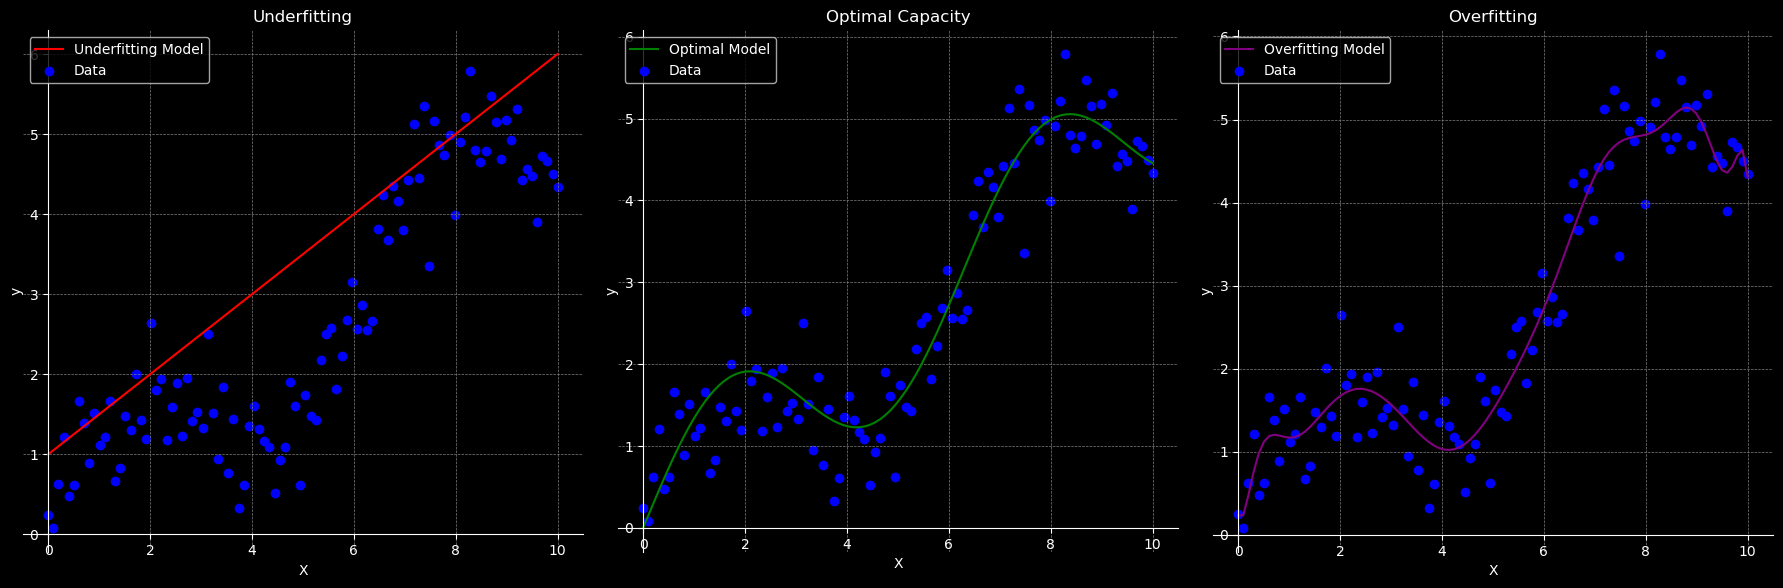

In [7]:
plt.style.use("dark_background")

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 0.5 * X + np.sin(X) + np.random.normal(scale=0.5, size=X.shape)

# Define the true function for optimal capacity
def true_function(x):
    return 0.5 * x + np.sin(x)

# Define polynomial models for underfitting, optimal capacity, and overfitting
def underfit_model(x):
    return 0.5 * x + 1

def optimal_model(x):
    return 0.5 * x + np.sin(x)

def overfit_model(x):
    coefficients = np.polyfit(X, y, 15)  # Overfitting with high-degree polynomial
    return np.polyval(coefficients, x)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot underfitting
axes[0].scatter(X, y, color='blue', label='Data')
axes[0].plot(X, underfit_model(X), color='red', label='Underfitting Model')
axes[0].set_title('Underfitting')
axes[0].legend()

# Plot optimal capacity
axes[1].scatter(X, y, color='blue', label='Data')
axes[1].plot(X, optimal_model(X), color='green', label='Optimal Model')
axes[1].set_title('Optimal Capacity')
axes[1].legend()

# Plot overfitting
axes[2].scatter(X, y, color='blue', label='Data')
axes[2].plot(X, overfit_model(X), color='purple', label='Overfitting Model')
axes[2].set_title('Overfitting')
axes[2].legend()

# Manim-like style adjustments
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
    ax.set_xlabel('X')
    ax.set_ylabel('y')

plt.tight_layout()
plt.show()


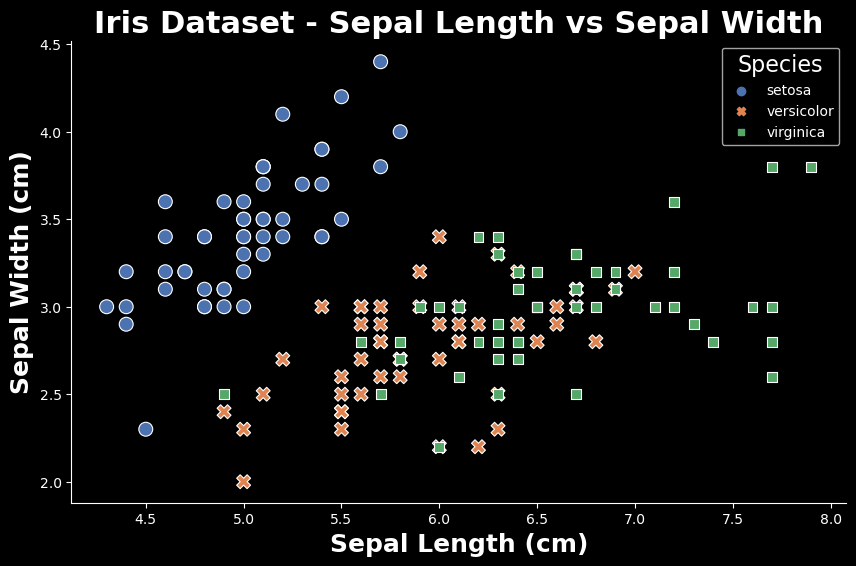

In [4]:
import seaborn as sns

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Manim-like style settings
plt.style.use("dark_background")

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species', style='species', palette='deep', s=100)

# Manim-like adjustments
plt.title('Iris Dataset - Sepal Length vs Sepal Width', fontsize=22, weight='bold')
plt.xlabel('Sepal Length (cm)', fontsize=18, weight='bold')
plt.ylabel('Sepal Width (cm)', fontsize=18, weight='bold')
plt.legend(title='Species', title_fontsize='16', loc='upper right')

# Customize axes
scatter.spines['top'].set_visible(False)
scatter.spines['right'].set_visible(False)
#scatter.spines['left'].set_position('zero')
#scatter.spines['bottom'].set_position('zero')
scatter.xaxis.set_ticks_position('bottom')
scatter.yaxis.set_ticks_position('left')

# Show the plot
plt.show()

The best value of k is 11 with an accuracy of 0.5400


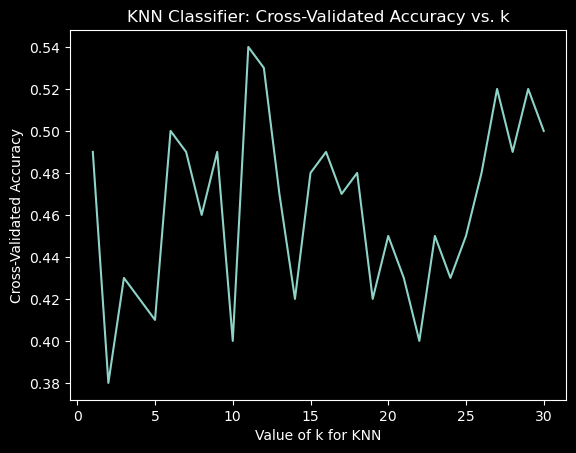

In [5]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Sample data
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = np.random.randint(0, 2, 100)  # Binary class labels

# Range of k values to test
k_range = range(1, 31)
k_scores = []

# Perform cross-validation for each k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')  # 10-fold cross-validation
    k_scores.append(scores.mean())

# Find the best k
best_k = k_range[np.argmax(k_scores)]
print(f"The best value of k is {best_k} with an accuracy of {max(k_scores):.4f}")

# Plot the cross-validation accuracy vs. k
import matplotlib.pyplot as plt

plt.plot(k_range, k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Classifier: Cross-Validated Accuracy vs. k')
plt.show()


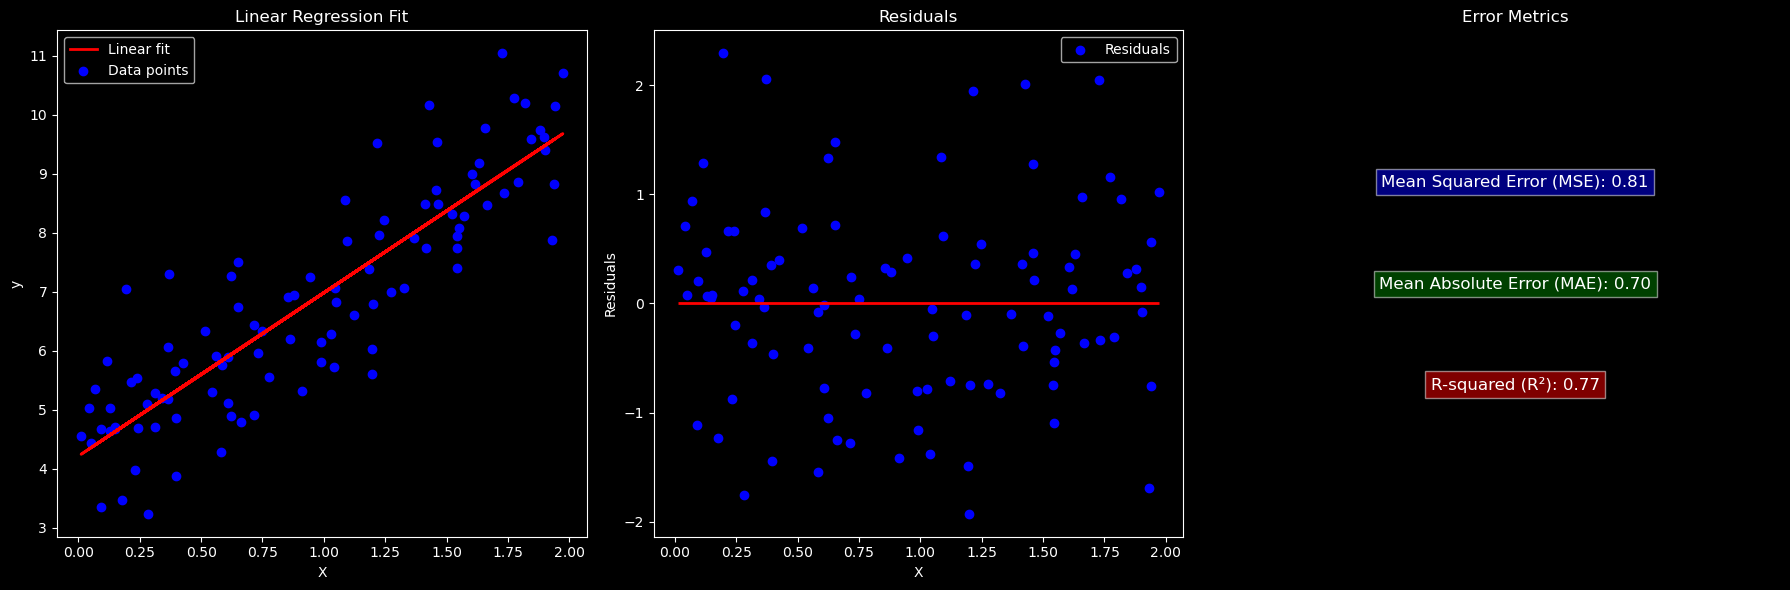

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Create linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Calculate metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot data and linear fit
axs[0].scatter(X, y, color='blue', label='Data points')
axs[0].plot(X, y_pred, color='red', linewidth=2, label='Linear fit')
axs[0].set_title('Linear Regression Fit')
axs[0].set_xlabel('X')
axs[0].set_ylabel('y')
axs[0].legend()

# Plot residuals
residuals = y - y_pred
axs[1].scatter(X, residuals, color='blue', label='Residuals')
axs[1].hlines(0, X.min(), X.max(), color='red', linewidth=2)
axs[1].set_title('Residuals')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Residuals')
axs[1].legend()

# Plot metrics
axs[2].text(0.5, 0.7, f'Mean Squared Error (MSE): {mse:.2f}', 
            horizontalalignment='center', verticalalignment='center', 
            fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))
axs[2].text(0.5, 0.5, f'Mean Absolute Error (MAE): {mae:.2f}', 
            horizontalalignment='center', verticalalignment='center', 
            fontsize=12, bbox=dict(facecolor='green', alpha=0.5))
axs[2].text(0.5, 0.3, f'R-squared (R²): {r2:.2f}', 
            horizontalalignment='center', verticalalignment='center', 
            fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
axs[2].set_title('Error Metrics')
axs[2].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

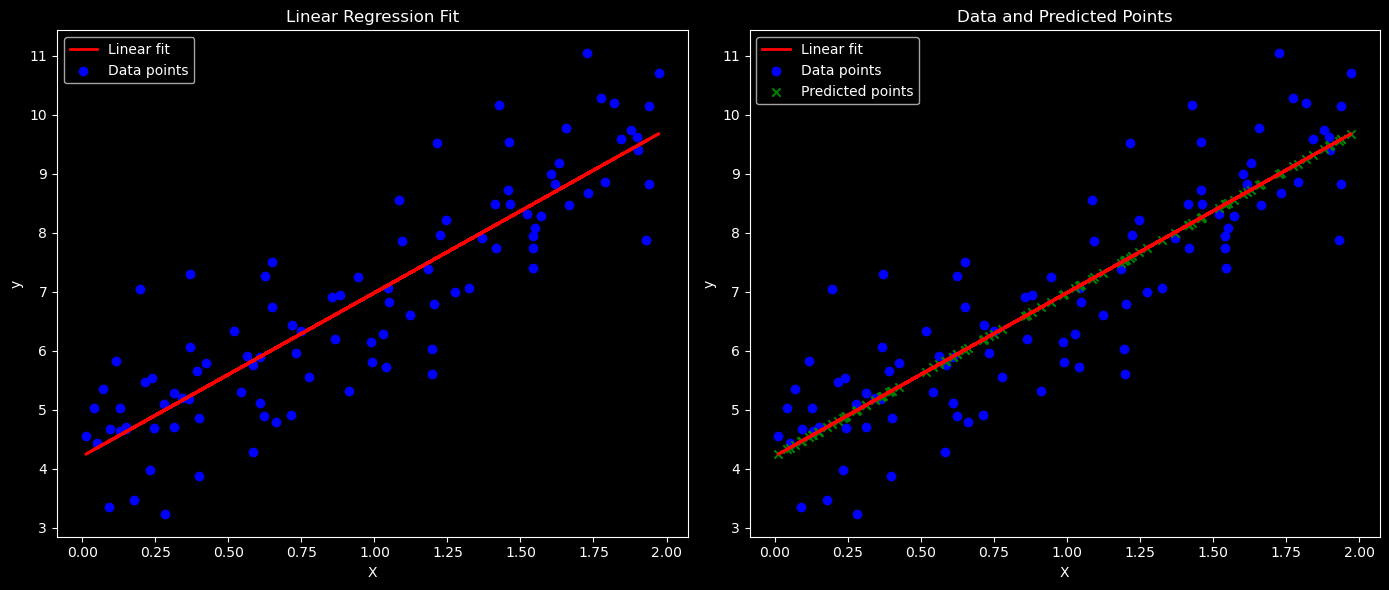

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Create linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# First subplot: original data points and line of best fit
axs[0].scatter(X, y, color='blue', label='Data points')
axs[0].plot(X, y_pred, color='red', linewidth=2, label='Linear fit')
axs[0].set_title('Linear Regression Fit')
axs[0].set_xlabel('X')
axs[0].set_ylabel('y')
axs[0].legend()

# Second subplot: original data points, predicted points, and line of best fit
axs[1].scatter(X, y, color='blue', label='Data points')
axs[1].scatter(X, y_pred, color='green', marker='x', label='Predicted points')
axs[1].plot(X, y_pred, color='red', linewidth=2, label='Linear fit')
axs[1].set_title('Data and Predicted Points')
axs[1].set_xlabel('X')
axs[1].set_ylabel('y')
axs[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


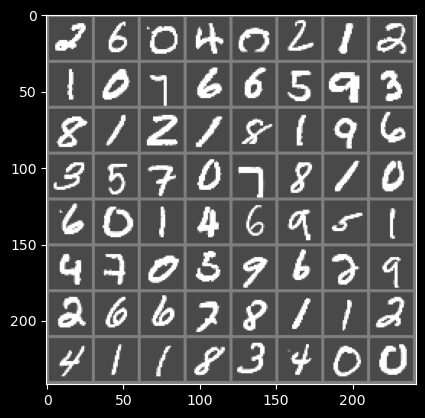

    2     6     0     4     0     2     1     2


In [13]:
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Download and load the training data
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.__next__()

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join('%5s' % labels[j].item() for j in range(8)))


In [ ]:
# Imports and setup
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, widgets
from IPython.display import display

# Data loading
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=False)

# Define a function to create the MLP model
def create_model(input_size, hidden_sizes, output_size, activation_fn, use_bias):
    layers = []
    previous_size = input_size
    for size in hidden_sizes:
        layers.append(nn.Linear(previous_size, size, bias=use_bias))
        if activation_fn == 'ReLU':
            layers.append(nn.ReLU())
        elif activation_fn == 'Sigmoid':
            layers.append(nn.Sigmoid())
        elif activation_fn == 'Tanh':
            layers.append(nn.Tanh())
        previous_size = size
    layers.append(nn.Linear(previous_size, output_size, bias=use_bias))
    return nn.Sequential(*layers)

# Training function
def train_model(model, trainloader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(images.view(images.shape[0], -1))
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}")

# Testing function
def test_model(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images.view(images.shape[0], -1))
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Accuracy: {100 * correct / total} %")

# Interactive widget function
def interactive_mlp(activation_fn, use_bias, layers, sizes, save_model):
    input_size = 784
    output_size = 10
    hidden_sizes = [sizes for _ in range(layers)]
    model = create_model(input_size, hidden_sizes, output_size, activation_fn, use_bias)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    train_model(model, trainloader, criterion, optimizer, epochs=5)
    test_model(model, testloader)
    if save_model:
        torch.save(model.state_dict(), 'saved_mlp.pth')

# Interactive widget setup
activation_fn_widget = widgets.Dropdown(options=['ReLU', 'Sigmoid', 'Tanh'], description='Activation:')
use_bias_widget = widgets.Checkbox(value=True, description='Use Bias')
layers_widget = widgets.IntSlider(min=1, max=5, step=1, value=2, description='Layers')
sizes_widget = widgets.IntSlider(min=10, max=200, step=10, value=50, description='Layer Size')
save_model_widget = widgets.Checkbox(value=False, description='Save Model')

interact(interactive_mlp, activation_fn=activation_fn_widget, use_bias=use_bias_widget, layers=layers_widget, sizes=sizes_widget, save_model=save_model_widget)



interactive(children=(Dropdown(description='Activation:', options=('ReLU', 'Sigmoid', 'Tanh'), value='ReLU'), …

In [32]:
import tkinter as tk
from tkinter import messagebox

# GUI for inputting numbers
class DigitClassifierGUI:
    def __init__(self, model):
        self.model = model
        self.root = tk.Tk()
        self.root.title("Digit Classifier")
        
        self.canvas = tk.Canvas(self.root, width=280, height=280, bg="white")
        self.canvas.grid(row=0, column=0, columnspan=2)
        self.canvas.bind("<B1-Motion>", self.paint)
        
        self.reset_button = tk.Button(self.root, text="Reset", command=self.reset)
        self.reset_button.grid(row=1, column=0)
        
        self.classify_button = tk.Button(self.root, text="Classify", command=self.classify)
        self.classify_button.grid(row=1, column=1)
        
        self.image = np.zeros((28, 28))
        
        self.root.mainloop()
    
    def paint(self, event):
        x, y = event.x, event.y
        self.canvas.create_rectangle((x, y) * 2, outline="black", width=20)
        self.image[y//10, x//10] = 1.0
        
    def reset(self):
        self.canvas.delete("all")
        self.image = np.zeros((28, 28))
        
    def classify(self):
        input_tensor = torch.tensor(self.image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
        input_tensor = input_tensor.view(1, -1)
        with torch.no_grad():
            output = self.model(input_tensor)
            _, predicted = torch.max(output.data, 1)
            messagebox.showinfo("Prediction", f'Predicted Number: {predicted.item()}')

        input_tensor = torch.tensor(self.image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
        input_tensor = input_tensor.view(1, -1)
        with torch.no_grad():
            output = self.model(input_tensor)
            _, predicted = torch.max(output.data, 1)
            print(f'Predicted Number: {predicted.item()}')


# Create and train a simple model for the GUI if the file does not exist
model_path = 'simple_mlp.pth'
try:
    print("Found existing model")
    simple_model = create_model(784, [128, 64], 10, 'ReLU', True)
    simple_model.load_state_dict(torch.load(model_path))
except FileNotFoundError:
    simple_model = create_model(784, [128, 64], 10, 'ReLU', True)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(simple_model.parameters(), lr=0.01, momentum=0.9)
    train_model(simple_model, trainloader, criterion, optimizer, epochs=5)
    torch.save(simple_model.state_dict(), model_path)

# Initialize the GUI
DigitClassifierGUI(simple_model)


Found existing model
Predicted Number: 8
Predicted Number: 8
Predicted Number: 3
